In [0]:
%pip install catboost
%pip install catboost xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
df = spark.read.csv('s3://bigdata-carsales-2015/', header=True)
df = df.toPandas()
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41,14282,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43,2641,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [0]:
df.shape

(558837, 16)

In [0]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41,14282,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43,2641,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [0]:
df.isna().sum()


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [0]:
df.dropna(inplace=True)

In [0]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [0]:
df['saledate'][0]

'Tue Dec 16 2014 12:30:00 GMT-0800 (PST)'

In [0]:
df.dtypes

year            object
make            object
model           object
trim            object
body            object
transmission    object
vin             object
state           object
condition       object
odometer        object
color           object
interior        object
seller          object
mmr             object
sellingprice    object
saledate        object
dtype: object

In [0]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [0]:
def infer_and_set_types(dataframe):
    for column in dataframe.columns:
        first_val = dataframe[column].iloc[0]
        try:
            pd.to_numeric(dataframe[column], errors='raise')
            dataframe[column] = dataframe[column].astype(int)
        except ValueError:
                dataframe[column] = dataframe[column].astype(str)
                print(f"{column} is treated as object (string or mixed type).")

    return dataframe


In [0]:
df=infer_and_set_types(df)
#df['year'] = pd.to_datetime(df['year'].astype(str), errors='coerce')
df['saledate'] = df['saledate'].str.rsplit(' ', 1).str[0]
df['saledate'] = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S GMT%z', errors='coerce')


make is treated as object (string or mixed type).
model is treated as object (string or mixed type).
trim is treated as object (string or mixed type).
body is treated as object (string or mixed type).
transmission is treated as object (string or mixed type).
vin is treated as object (string or mixed type).
state is treated as object (string or mixed type).
color is treated as object (string or mixed type).
interior is treated as object (string or mixed type).
seller is treated as object (string or mixed type).
saledate is treated as object (string or mixed type).


In [0]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
df['sale_Date'] = df['saledate'].dt.date
df['sale_year'] = df['saledate'].dt.year
df['sale_Weekday'] = df['saledate'].dt.day_name()
df['sale_Time'] = df['saledate'].dt.strftime('%H:%M:%S')
df['Month'] = df['saledate'].dt.month_name() 

In [0]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
sale_Date       0
sale_year       0
sale_Weekday    0
sale_Time       0
Month           0
dtype: int64

In [0]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_Date,sale_year,sale_Weekday,sale_Time,Month
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,kia motors america inc,20500,21500,2014-12-16 20:30:00+00:00,2014-12-16,2014,Tuesday,20:30:00,December
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,kia motors america inc,20800,21500,2014-12-16 20:30:00+00:00,2014-12-16,2014,Tuesday,20:30:00,December
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45,1331,gray,black,financial services remarketing (lease),31900,30000,2015-01-15 12:30:00+00:00,2015-01-15,2015,Thursday,12:30:00,January
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41,14282,white,black,volvo na rep/world omni,27500,27750,2015-01-29 12:30:00+00:00,2015-01-29,2015,Thursday,12:30:00,January
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43,2641,gray,black,financial services remarketing (lease),66000,67000,2014-12-18 20:30:00+00:00,2014-12-18,2014,Thursday,20:30:00,December


In [0]:
df['make'].value_counts()

Ford             81013
Chevrolet        54150
Nissan           44043
Toyota           35313
Dodge            27181
Honda            24781
Hyundai          18659
BMW              17509
Kia              15828
Chrysler         15133
Infiniti         14011
Mercedes-Benz    14008
Jeep             12735
Volkswagen       10780
Lexus            10409
GMC               9217
Mazda             6930
Cadillac          6315
Lincoln           4926
Audi              4802
Acura             4503
Buick             4470
Subaru            4369
Ram               4044
Pontiac           4018
Mitsubishi        3661
Volvo             3082
MINI              2946
Saturn            2570
Mercury           1571
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             977
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
Bentley            105
Aston Marti

In [0]:
df_toyo=df[df['make']=='Toyota']
df_to_s=df_toyo[df_toyo['model'].isin(['Camry', 'Corolla'])]

In [0]:
#most of my friends prefer to buy the toyota.(Used cars)

In [0]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_Date,sale_year,sale_Weekday,sale_Time,Month,count
0,2015-01-01,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,kia motors america inc,20500,21500,2014-12-16 20:30:00+00:00,2014-12-16,2014,Tuesday,20:30:00,December,1
1,2015-01-01,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,kia motors america inc,20800,21500,2014-12-16 20:30:00+00:00,2014-12-16,2014,Tuesday,20:30:00,December,1
2,2014-01-01,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45,1331,gray,black,financial services remarketing (lease),31900,30000,2015-01-15 12:30:00+00:00,2015-01-15,2015,Thursday,12:30:00,January,1
3,2015-01-01,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41,14282,white,black,volvo na rep/world omni,27500,27750,2015-01-29 12:30:00+00:00,2015-01-29,2015,Thursday,12:30:00,January,1
4,2014-01-01,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43,2641,gray,black,financial services remarketing (lease),66000,67000,2014-12-18 20:30:00+00:00,2014-12-18,2014,Thursday,20:30:00,December,1


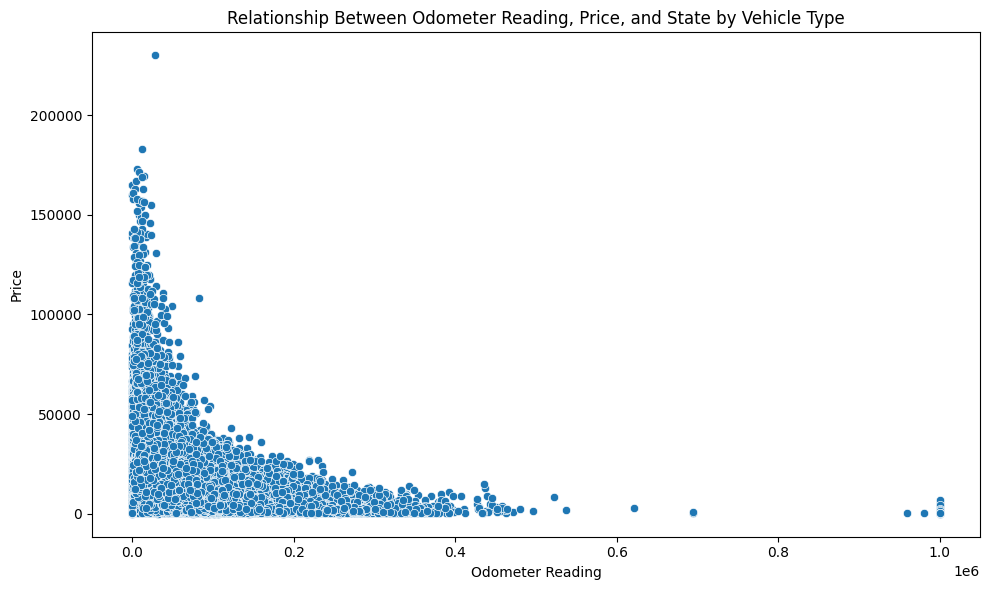

In [0]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='odometer', y='sellingprice')
plt.title('Relationship Between Odometer Reading, Price, and State by Vehicle Type')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')
#plt.legend(title='Vehicle/State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

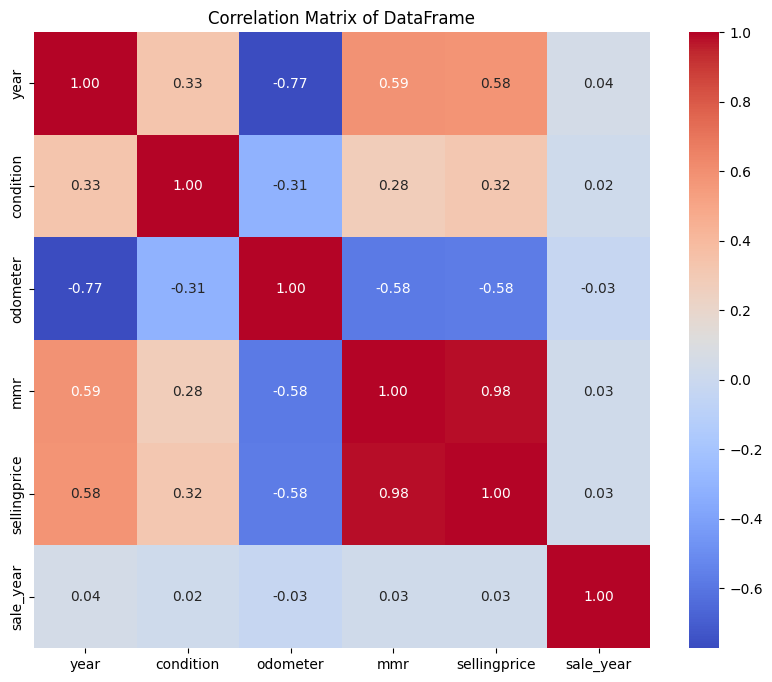

In [0]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of DataFrame')
plt.show()

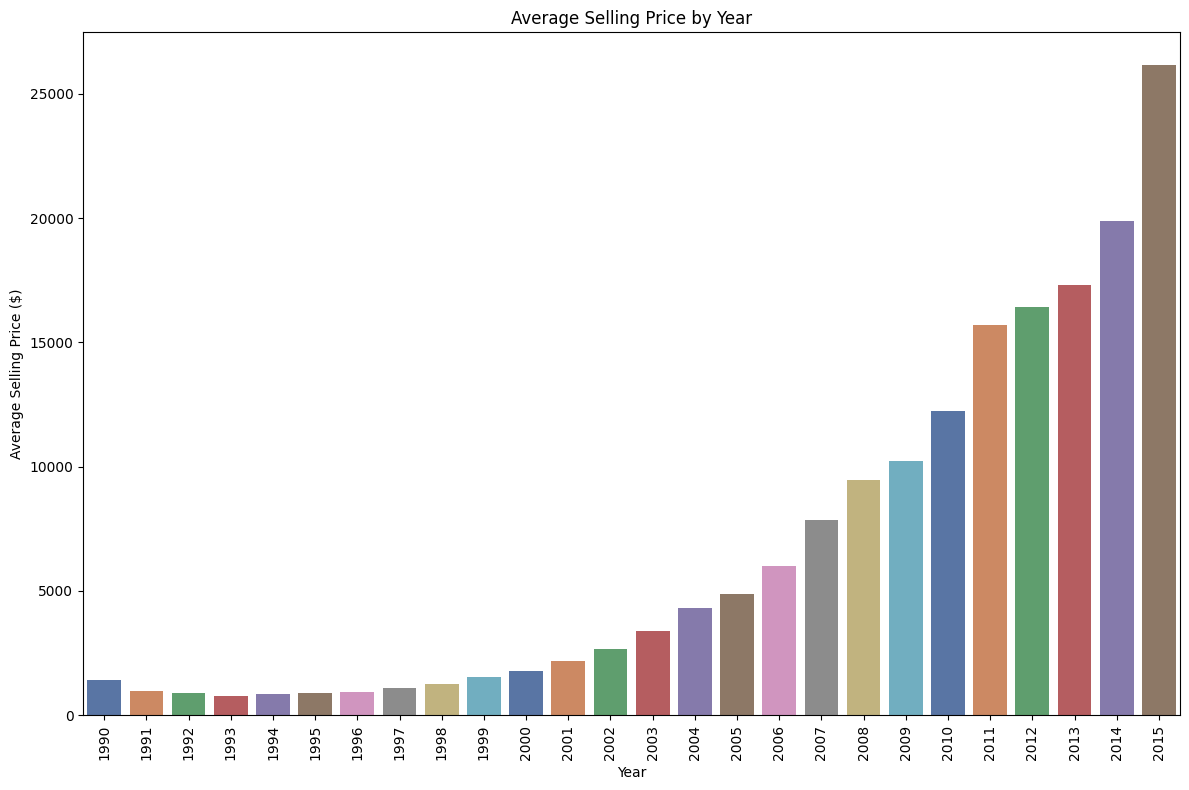

In [0]:
avg_price_by_year = df.groupby('year')['sellingprice'].mean().reset_index()
#avg_price_by_year['year'] = avg_price_by_year['year'].dt.year
plt.figure(figsize=(12, 8))
bar_chart = sns.barplot(data=avg_price_by_year, x='year', y='sellingprice', palette='deep')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

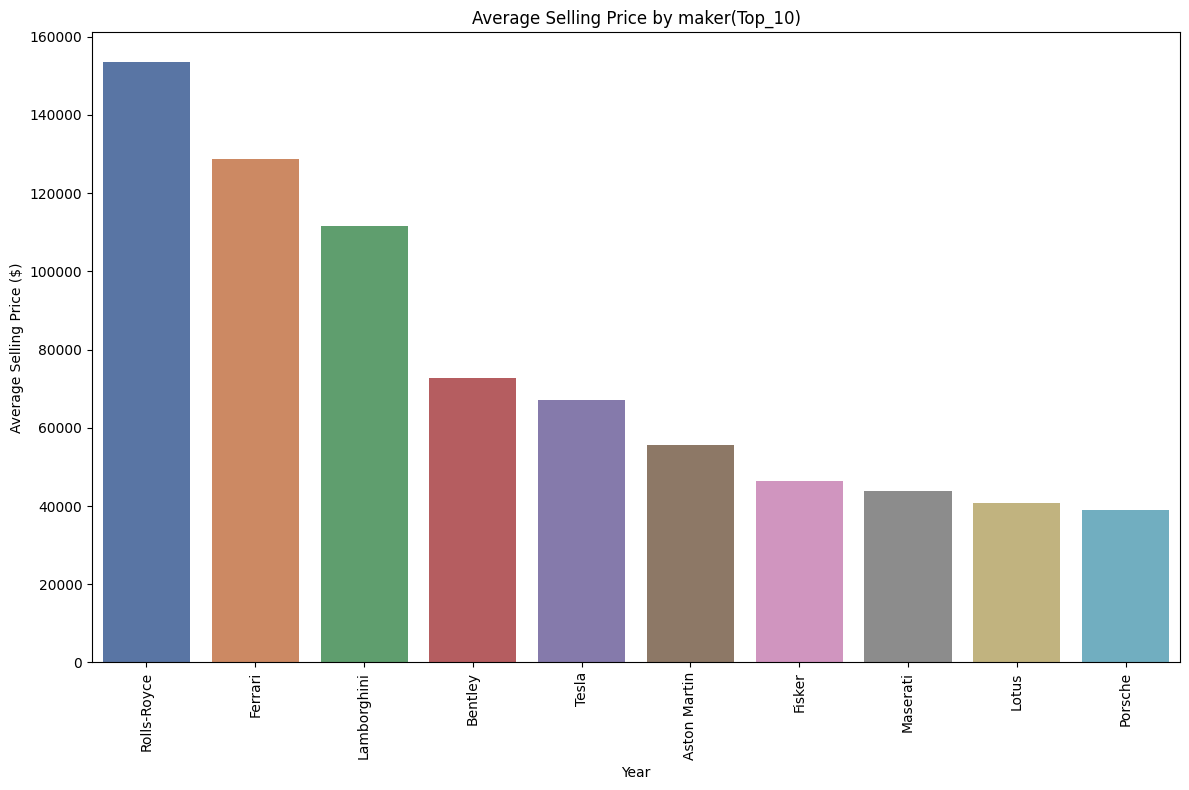

In [0]:
avg_price_by_maker = df.groupby('make')['sellingprice'].mean().reset_index()
avg_price_by_maker = avg_price_by_maker.sort_values(by='sellingprice', ascending=False)
avg_10=avg_price_by_maker.head(10)
plt.figure(figsize=(12, 8)) 
bar_chart = sns.barplot(data=avg_10, x='make', y='sellingprice', palette='deep')
plt.title('Average Selling Price by maker(Top_10)')
plt.xlabel('Year')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

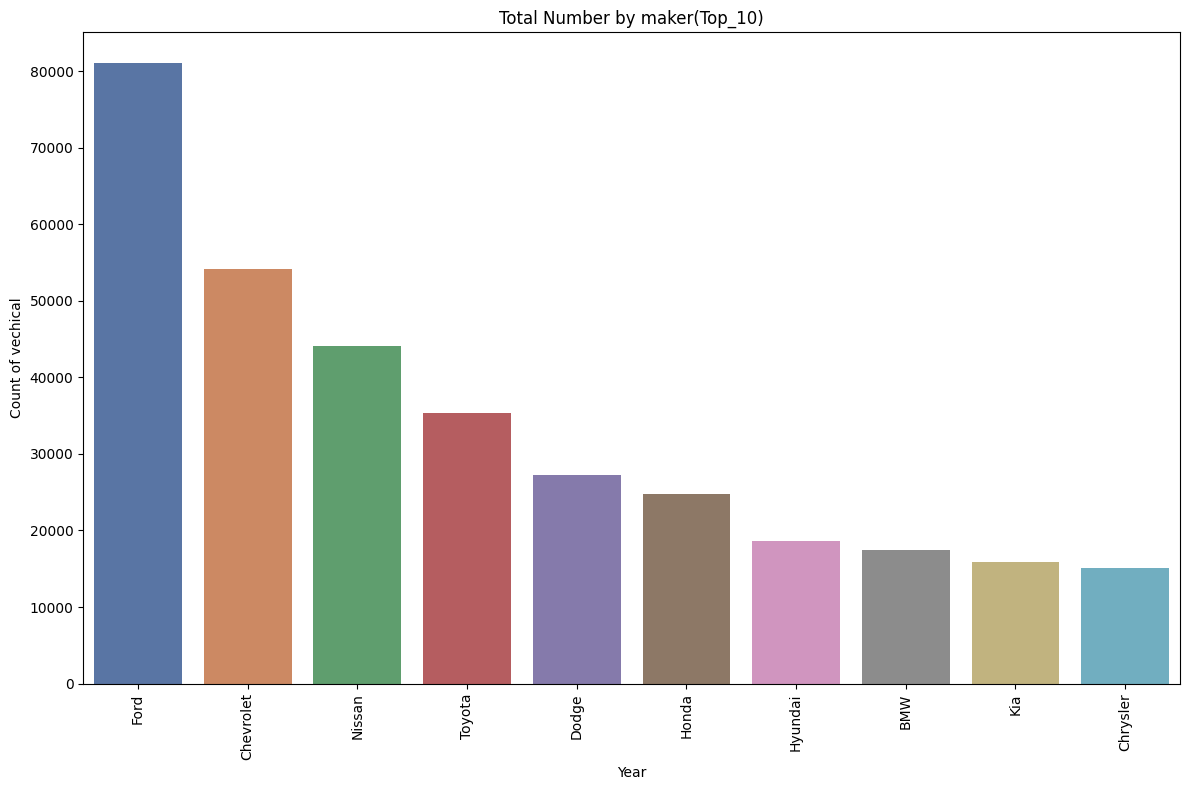

In [0]:

count_by_maker = df.groupby('make')['sellingprice'].count().reset_index()
count_by_maker.columns=['make','count']
count_by_maker = count_by_maker.sort_values(by='count', ascending=False)
count_10=count_by_maker.head(10)
plt.figure(figsize=(12, 8)) 
bar_chart = sns.barplot(data=count_10, x='make', y='count', palette='deep')
plt.title('Total Number by maker(Top_10)')
plt.xlabel('Year')
plt.ylabel('Count of vechical')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [0]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'sale_Date', 'sale_year', 'sale_Weekday',
       'sale_Time', 'Month'],
      dtype='object')

In [0]:
count_by_month

,Month,count
2,February,142338
3,January,121401
5,June,85405
7,May,43634
6,March,40590
1,December,36598
0,April,1246
4,July,1113


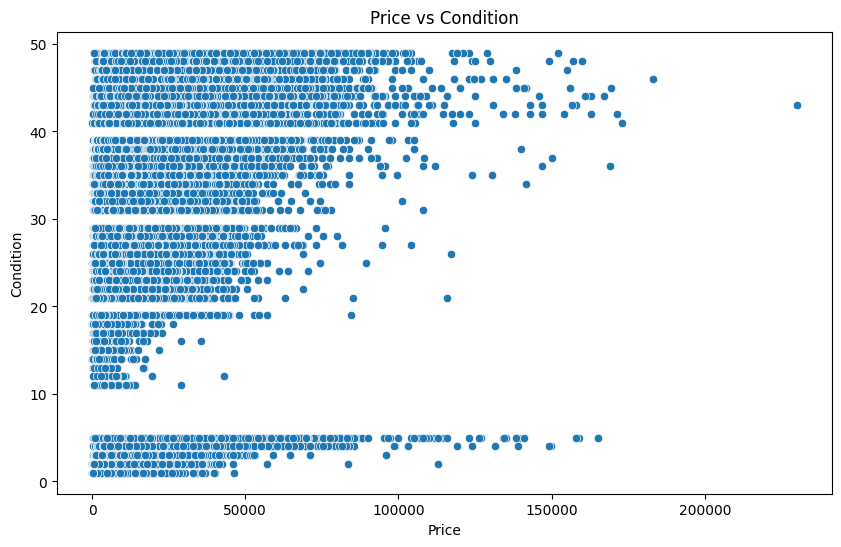

In [0]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='sellingprice', y='condition')
plt.title('Price vs Condition')
plt.xlabel('Price')
plt.ylabel('Condition')

# Show the plot
plt.show()

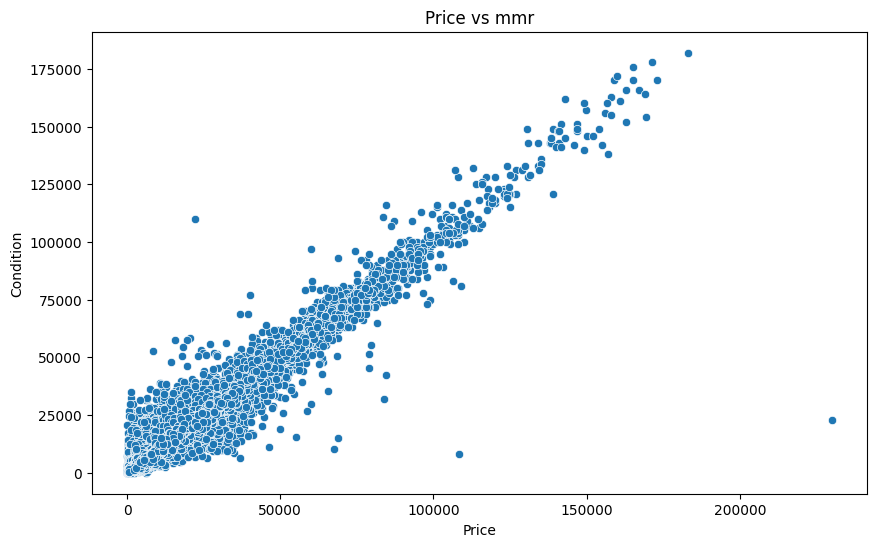

In [0]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='sellingprice', y='mmr')
plt.title('Price vs mmr')
plt.xlabel('Price')
plt.ylabel('Condition')

# Show the plot
plt.show()

In [0]:
df_to_s.shape

(17731, 21)

In [0]:
df_to_s.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'sale_Date', 'sale_year', 'sale_Weekday',
       'sale_Time', 'Month'],
      dtype='object')

In [0]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_Date,sale_year,sale_Weekday,sale_Time,Month
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,kia motors america inc,20500,21500,2014-12-16 20:30:00+00:00,2014-12-16,2014,Tuesday,20:30:00,December
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,kia motors america inc,20800,21500,2014-12-16 20:30:00+00:00,2014-12-16,2014,Tuesday,20:30:00,December
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45,1331,gray,black,financial services remarketing (lease),31900,30000,2015-01-15 12:30:00+00:00,2015-01-15,2015,Thursday,12:30:00,January
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41,14282,white,black,volvo na rep/world omni,27500,27750,2015-01-29 12:30:00+00:00,2015-01-29,2015,Thursday,12:30:00,January
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43,2641,gray,black,financial services remarketing (lease),66000,67000,2014-12-18 20:30:00+00:00,2014-12-18,2014,Thursday,20:30:00,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39,66403,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,2015-07-07 13:15:00+00:00,2015-07-07,2015,Tuesday,13:15:00,July
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393,white,black,i -5 uhlmann rv,30200,30800,2015-07-08 16:30:00+00:00,2015-07-08,2015,Wednesday,16:30:00,July
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48,50561,black,black,financial services remarketing (lease),29800,34000,2015-07-08 16:30:00+00:00,2015-07-08,2015,Wednesday,16:30:00,July
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38,16658,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,2015-07-09 13:45:00+00:00,2015-07-09,2015,Thursday,13:45:00,July


In [0]:
y = car_prices['sellingprice']
X = car_prices[['year', 'make', 'model', 'odometer', 'condition','mmr','state']]

categorical_features = ['make', 'model','state']
numerical_features = ['year', 'odometer', 'condition','mmr']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [0]:


Linear_Re = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear_Re.fit(X_train, y_train)

y_pred = Linear_Re.predict(X_test)
print(f'Linear Regression R² score: {r2_score(y_test, y_pred)}')

Linear Regression R² score: 0.9710331733505009


R² scores for each fold: [0.96842918 0.96997892 0.97357164 0.9571498  0.97745458]


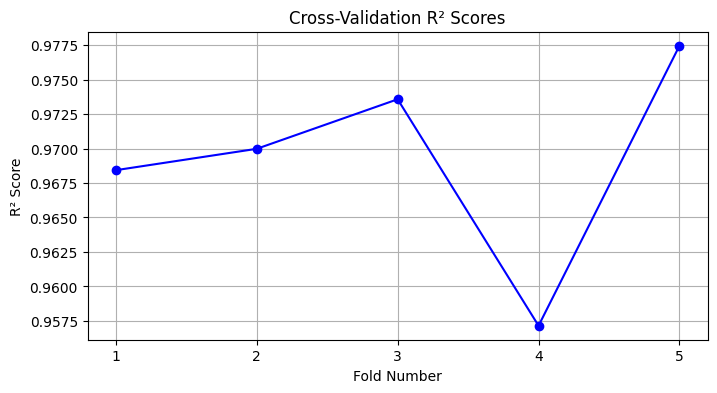

In [0]:
from sklearn.model_selection import cross_val_score
scores_LR = cross_val_score(Linear_Re, X, y, cv=5, scoring='r2')
print("R² scores for each fold:", scores_LR)

# Plotting the R² scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(scores_LR) + 1), scores_LR, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation R² Scores')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.grid(True)
plt.xticks(range(1, len(scores_LR) + 1))
plt.show()

In [0]:

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_pipeline.fit(X_train, y_train)

y_pred = tree_pipeline.predict(X_test)
print(f'Decision Tree R² score: {r2_score(y_test, y_pred)}')

Decision Tree R² score: 0.867438793424291


R² scores for each fold: [0.86659249 0.86840711 0.86817386 0.85038873 0.85869431]


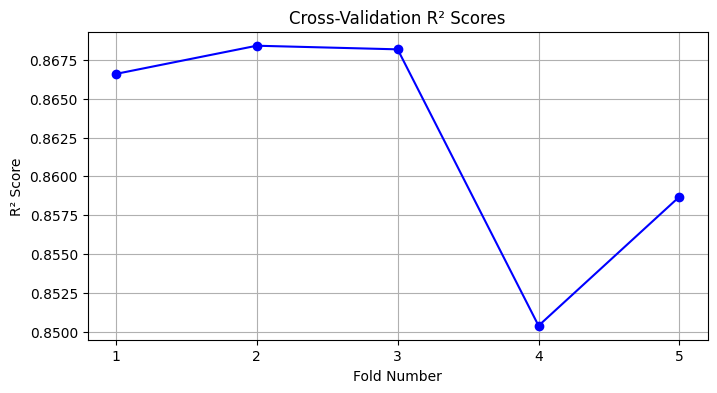

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_pipeline, X, y, cv=5, scoring='r2')
print("R² scores for each fold:", scores)

# Plotting the R² scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation R² Scores')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.grid(True)
plt.xticks(range(1, len(scores) + 1))
plt.show()

In [0]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_Date,sale_year,sale_Weekday,sale_Time,Month
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,kia motors america inc,20500,21500,2014-12-16 20:30:00+00:00,2014-12-16,2014,Tuesday,20:30:00,December
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,kia motors america inc,20800,21500,2014-12-16 20:30:00+00:00,2014-12-16,2014,Tuesday,20:30:00,December
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45,1331,gray,black,financial services remarketing (lease),31900,30000,2015-01-15 12:30:00+00:00,2015-01-15,2015,Thursday,12:30:00,January
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41,14282,white,black,volvo na rep/world omni,27500,27750,2015-01-29 12:30:00+00:00,2015-01-29,2015,Thursday,12:30:00,January
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43,2641,gray,black,financial services remarketing (lease),66000,67000,2014-12-18 20:30:00+00:00,2014-12-18,2014,Thursday,20:30:00,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39,66403,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,2015-07-07 13:15:00+00:00,2015-07-07,2015,Tuesday,13:15:00,July
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393,white,black,i -5 uhlmann rv,30200,30800,2015-07-08 16:30:00+00:00,2015-07-08,2015,Wednesday,16:30:00,July
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48,50561,black,black,financial services remarketing (lease),29800,34000,2015-07-08 16:30:00+00:00,2015-07-08,2015,Wednesday,16:30:00,July
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38,16658,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,2015-07-09 13:45:00+00:00,2015-07-09,2015,Thursday,13:45:00,July


In [0]:
def predict_car_price(model):
    inputs = {}
    for feature in numerical_features:
        inputs[feature] = float(input(f"Enter {feature}: "))
    for feature in categorical_features:
        inputs[feature] = input(f"Enter {feature}: ")
    input_df = pd.DataFrame([inputs])
    prediction = model.predict(input_df)
    return prediction[0]

In [0]:
predicted_price = predict_car_price(Linear_Re)
print(f"The predicted selling price of the car is: ${predicted_price:.2f}")

Enter year:  2013

Enter odometer:  38882

Enter condition:  38

Enter mmr:  13200

Enter make:  Toyota

Enter model:  Camry

Enter state:  ca

The predicted selling price of the car is: $13246.73


In [0]:
df[df['model']=='Camry']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_Date,sale_year,sale_Weekday,sale_Time,Month
562,2013,Toyota,Camry,LE,Sedan,automatic,4t4bf1fk5dr275482,ca,38,38882,red,beige,avis corporation,13200,13500,2014-12-18 19:30:00+00:00,2014-12-18,2014,Thursday,19:30:00,December
563,2013,Toyota,Camry,XLE,Sedan,automatic,4t1bk1fk0du529833,ca,5,2575,black,gray,the car exchange,21800,22000,2014-12-17 20:30:00+00:00,2014-12-17,2014,Wednesday,20:30:00,December
699,2013,Toyota,Camry,LE,Sedan,automatic,4t4bf1fk2dr316831,ca,44,13948,beige,beige,toyota financial services,14950,14900,2014-12-23 08:00:00+00:00,2014-12-23,2014,Tuesday,08:00:00,December
704,2013,Toyota,Camry,SE,Sedan,automatic,4t1bf1fk5du259552,ca,38,30392,black,black,jpmorgan chase bank n.a.,15200,15700,2014-12-18 20:00:00+00:00,2014-12-18,2014,Thursday,20:00:00,December
740,2013,Toyota,Camry,L,Sedan,automatic,4t1bf1fk4du283826,ca,2,31300,silver,black,enterprise vehicle exchange / tra / rental / t...,13350,11200,2014-12-16 21:00:00+00:00,2014-12-16,2014,Tuesday,21:00:00,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558140,2007,Toyota,Camry,LE,sedan,automatic,4t1be46k57u143616,fl,32,51066,silver,gray,ferco motors corp,7850,8000,2015-06-19 09:45:00+00:00,2015-06-19,2015,Friday,09:45:00,June
558201,2002,Toyota,Camry,SE V6,sedan,automatic,4t1bf32k82u534345,ca,19,190668,green,gray,lithia hyundai of fresno,1975,1600,2015-06-18 13:00:00+00:00,2015-06-18,2015,Thursday,13:00:00,June
558330,2011,Toyota,Camry,LE,sedan,automatic,4t1bf3ek5bu767899,pa,4,51351,blue,gray,hawthorne auto sales co,10350,10700,2015-06-19 09:00:00+00:00,2015-06-19,2015,Friday,09:00:00,June
558368,2009,Toyota,Camry,LE,sedan,automatic,4t1be46k09u850089,pa,29,127667,green,beige,adcock brothers inc,6450,5600,2015-06-19 09:00:00+00:00,2015-06-19,2015,Friday,09:00:00,June


In [0]:
####the price of the index : 562 of the Camry based on the conditionS ACTUAL PRICE : $13500 PREDICTED WAS : $13246.73 only

In [0]:
#lets create the models for individual maker or for particular some specific models So our model can predict .close to the actual value. And also by increasing the features for better accuracy . 
#Lets create the model only for the toyota Sience most of my friends are purchasing the second hand Toyota(Cord)

In [0]:
df_Toy = df[(df['make'] == 'Toyota') & (df['model'].isin(['Camry', 'Corolla']))]

In [0]:
df_Toy

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_Date,sale_year,sale_Weekday,sale_Time,Month
549,2013,Toyota,Corolla,LE,Sedan,automatic,5yfbu4ee5dp216754,ca,1,34915,black,gray,enterprise vehicle exchange / tra / rental / t...,11400,9200,2014-12-16 20:00:00+00:00,2014-12-16,2014,Tuesday,20:00:00,December
557,2013,Toyota,Corolla,S,Sedan,automatic,2t1bu4ee4dc089995,ca,47,19836,orange,black,consolidated asset recovery systems inc.,13500,14100,2014-12-17 20:30:00+00:00,2014-12-17,2014,Wednesday,20:30:00,December
562,2013,Toyota,Camry,LE,Sedan,automatic,4t4bf1fk5dr275482,ca,38,38882,red,beige,avis corporation,13200,13500,2014-12-18 19:30:00+00:00,2014-12-18,2014,Thursday,19:30:00,December
563,2013,Toyota,Camry,XLE,Sedan,automatic,4t1bk1fk0du529833,ca,5,2575,black,gray,the car exchange,21800,22000,2014-12-17 20:30:00+00:00,2014-12-17,2014,Wednesday,20:30:00,December
572,2013,Toyota,Corolla,LE,Sedan,automatic,5yfbu4ee7dp143368,ca,1,48744,—,gray,fox rent a car tra,10600,9500,2014-12-16 20:00:00+00:00,2014-12-16,2014,Tuesday,20:00:00,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558494,2014,Toyota,Corolla,LE,sedan,automatic,5yfburhe4ep064802,pa,39,34822,silver,gray,avis corporation,12250,12300,2015-06-19 09:00:00+00:00,2015-06-19,2015,Friday,09:00:00,June
558522,2013,Toyota,Corolla,S,sedan,manual,2t1bu4eexdc970538,pa,42,40610,black,black,r hollenshead auto sales inc,12150,10500,2015-06-19 09:00:00+00:00,2015-06-19,2015,Friday,09:00:00,June
558532,2010,Toyota,Corolla,S,sedan,automatic,1nxbu4ee6az175965,pa,36,71129,—,black,r hollenshead auto sales inc,8450,8600,2015-06-19 09:00:00+00:00,2015-06-19,2015,Friday,09:00:00,June
558544,2000,Toyota,Camry,LE,sedan,automatic,4t1bg22k3yu618587,ma,19,129476,silver,gray,boch toyota/scion south,2050,2300,2015-06-18 18:30:00+00:00,2015-06-18,2015,Thursday,18:30:00,June


Linear Regression R² score: 0.9162928696719689
R² scores for each fold: [0.94191966 0.93915023 0.94545225 0.86834278 0.93801341]


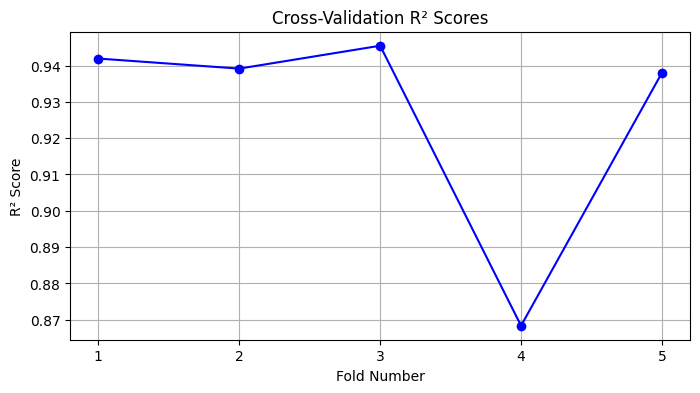

In [0]:
y = df_Toy['sellingprice']
X = df_Toy[['year', 'make', 'model', 'odometer', 'condition','mmr','state','trim','body','transmission','interior','Month']]

categorical_features = ['make', 'model','state','trim','body','transmission','interior','Month']
numerical_features = ['year', 'odometer', 'condition','mmr']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
linear_Toy = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_Toy.fit(X_train, y_train)

y_pred = linear_Toy.predict(X_test)
print(f'Linear Regression R² score: {r2_score(y_test, y_pred)}')
scores_LR = cross_val_score(linear_Toy, X, y, cv=5, scoring='r2')
print("R² scores for each fold:", scores_LR)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(scores_LR) + 1), scores_LR, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation R² Scores')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.grid(True)
plt.xticks(range(1, len(scores_LR) + 1))
plt.show()

In [0]:
predicted_price = predict_car_price(linear_Toy)
print(f"The predicted selling price of the car for Toyota is: ${predicted_price:.2f}")

Enter year:  2014

Enter odometer:  13219

Enter condition:  44

Enter mmr:  17100

Enter make:  Toyota

Enter model:  Camry

Enter state:  fl

Enter trim:  SE

Enter body:  Sedan

Enter transmission:  automatic

Enter interior:  black

Enter Month:  December

The predicted selling price of the car for Toyota is: $17228.22


In [0]:
print("The Actual selling price at index 557 is:", df_Toy.iloc[557]['sellingprice'])
df_Toy.iloc[557]

The Actual selling price at index 557 is: 17200


year                                      2014
make                                    Toyota
model                                    Camry
trim                                        SE
body                                     Sedan
transmission                         automatic
vin                          4t1bf1fk2eu783890
state                                       fl
condition                                   44
odometer                                 13219
color                                    white
interior                                 black
seller          enterprise veh exchange/rental
mmr                                      17100
sellingprice                             17200
saledate             2014-12-19 17:20:00+00:00
sale_Date                           2014-12-19
sale_year                                 2014
sale_Weekday                            Friday
sale_Time                             17:20:00
Month                                 December
Name: 30702, 